<a href="https://colab.research.google.com/github/thanhtruongphan/HomeworkAI/blob/main/HW_FuzzyLogic_4_Patient_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Họ và tên sinh viên : Phan Thanh Trường**
## **MSSV :                19146293**
## **Fuzzy Logic - Patient Management**

In [ ]:
!pip install scikit-fuzzy

import numpy as np 
import skfuzzy as fuzzy 
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=357e46cc0fb2aea9e7ff9cbcc810552580298b0b63e6de140efec577568e1c9d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
status = ctrl.Antecedent(np.arange(0,1.1,0.1),'Status')
emer = ctrl.Antecedent(np.arange(0,1.1,0.1),'Emergency')
appoint = ctrl.Consequent(np.arange(0,1.1,0.1),'Appointment')

status['L'] = fuzzy.trimf(status.universe,[0,0,0.5])
status['N'] = fuzzy.trimf(status.universe,[0,0.5,1])
status['H'] = fuzzy.trimf(status.universe,[0.5,1,1])

emer['L'] = fuzzy.trimf(emer.universe,[0,0,0.5])
emer['N'] = fuzzy.trimf(emer.universe,[0,0.5,1])
emer['H'] = fuzzy.trimf(emer.universe,[0.5,1,1])

appoint['L'] = fuzzy.trimf(appoint.universe,[0,0,0.5])
appoint['N'] = fuzzy.trimf(appoint .universe,[0,0.5,1])
appoint['H'] = fuzzy.trimf(appoint .universe,[0.5,1,1])

In [ ]:
rule1 = ctrl.Rule(status['L']&emer['L'],appoint['L'])
rule2 = ctrl.Rule(status['L']&emer['N'],appoint['L'])
rule3 = ctrl.Rule(status['L']&emer['H'],appoint['L'])

rule4 = ctrl.Rule(status['N']&emer['L'],appoint['N'])
rule5 = ctrl.Rule(status['N']&emer['N'],appoint['N'])
rule6 = ctrl.Rule(status['N']&emer['H'],appoint['N'])

rule7 = ctrl.Rule(status['H']&emer['L'],appoint['H'])
rule8 = ctrl.Rule(status['H']&emer['N'],appoint['H'])
rule9 = ctrl.Rule(status['H']&emer['H'],appoint['H'])


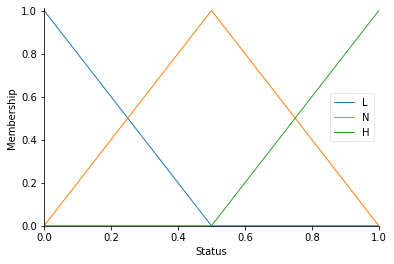

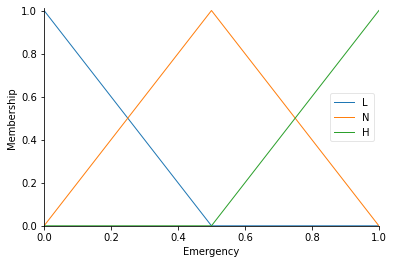

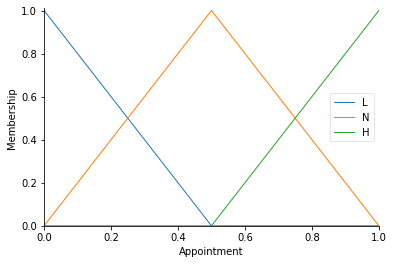

In [ ]:
status.view()
emer.view()
appoint.view()

0.6725490196078433


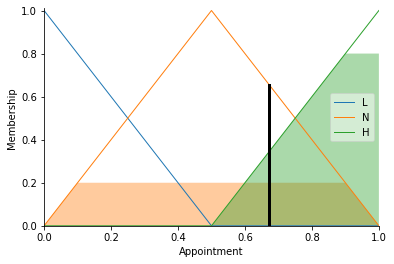

In [ ]:
appointing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

appointing = ctrl.ControlSystemSimulation(appointing_ctrl)
appointing.input['Status'] = 0.9
appointing.input['Emergency'] = 0.9
appointing.compute()
print(appointing.output['Appointment'])
appoint.view(sim=appointing)
